<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$

__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    
__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

# EXE 1.1 - REGRESSÃO LINEAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1, make_classification

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [5]:
X, y = getData()
X.shape, y.shape

((10000, 5), (10000,))

In [6]:
x1_treino, x1_teste, y1_treino, y1_teste = train_test_split(X, y, test_size=0.30)

In [8]:
x1_treino.shape, y1_treino.shape

((7000, 5), (7000,))

In [9]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [12]:
lr = [0.030, 0.075, 0.01, 1]
nstp = [2, 50, 100, 200]

for i in nstp:
  for j in lr:
    modelo = regLinear(learning_rate = j, num_steps = i)
    modelo.fit(x1_treino, y1_treino)

    print('Parametros: lr = {} e nsteps = {}'.format(j, i))
    print("MSE do treino:", mean_squared_error(y1_treino, modelo.predict(x1_treino)))
    print("MSE do teste:", mean_squared_error(y1_teste, modelo.predict(x1_teste)))
    print('====='*10)

modelo treinado.
Parametros: lr = 0.03 e nsteps = 2
MSE do treino: 153.98580756342463
MSE do teste: 155.04418448129186
modelo treinado.
Parametros: lr = 0.075 e nsteps = 2
MSE do treino: 72.19771925208138
MSE do teste: 73.77689755967126
modelo treinado.
Parametros: lr = 0.01 e nsteps = 2
MSE do treino: 219.57202641540013
MSE do teste: 220.0174655671112
modelo treinado.
Parametros: lr = 1 e nsteps = 2
MSE do treino: 39383.40083904776
MSE do teste: 39120.84640297989
modelo treinado.
Parametros: lr = 0.03 e nsteps = 50
MSE do treino: 34.931775630328566
MSE do teste: 36.732573595172624
modelo treinado.
Parametros: lr = 0.075 e nsteps = 50
MSE do treino: 33.26789670718291
MSE do teste: 35.28675774526853
modelo treinado.
Parametros: lr = 0.01 e nsteps = 50
MSE do treino: 37.33221485049931
MSE do teste: 39.31260307086655
modelo treinado.
Parametros: lr = 1 e nsteps = 50
MSE do treino: 8.38074101424109e+57
MSE do teste: 8.324195226048476e+57
modelo treinado.
Parametros: lr = 0.03 e nsteps = 10

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
modelo_prov = LinearRegression()
modelo_prov.fit(x1_treino, y1_treino)
ypred = modelo_prov.predict(x1_treino)

In [17]:
print("MSE do treino:", mean_squared_error(y1_treino, modelo_prov.predict(x1_treino)))
print("MSE do teste:", mean_squared_error(y1_teste, modelo_prov.predict(x1_teste)))

MSE do treino: 30.325995568516145
MSE do teste: 31.937287929401336


#EXE 1.2 - REGRESSÃO LINEAR

In [18]:
from sklearn.linear_model import Ridge, Lasso

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
from sklearn.preprocessing import StandardScaler

In [23]:
lr = [0.001, 0.030, 0.075, 0.01, 1]
nstp = [2, 4, 6, 50, 100, 200]
alp = [0, 0.001, 0.01, 0.1, 1]

def polyFit(X, y, grau, lr=lr, nstp=nstp, n_alpha=alp):
  poly_features = PolynomialFeatures(degree = grau, include_bias = False)
  x_poly = poly_features.fit_transform(X)
    
  for i in nstp:
    for j in lr:
      for k in n_alpha:
        
        modelo = regLinear(learning_rate = j, num_steps = i)
        m_ridge = Ridge(alpha = k)
        m_lasso = Lasso(alpha = k)
        modelo.fit(x_poly, y)
        m_ridge.fit(x_poly,y)
        m_lasso.fit(x_poly,y)

        print('Parametros: lr = {} , nsteps = {} e alpha = {}'.format(j, i, k))
        print("MSE de treino:", mean_squared_error(y, modelo.predict(x_poly)))
        print("MSE de treino RIDGE:", mean_squared_error(y, m_ridge.predict(x_poly)))
        print("MSE de treino Lasso:", mean_squared_error(y, m_lasso.predict(x_poly)))
        print('====='*10)

polyFit(x1_treino,y1_treino,2)

modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.001 , nsteps = 2 e alpha = 0
MSE de treino: 263.3249564782307
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.001 , nsteps = 2 e alpha = 0.001
MSE de treino: 312.2259777027068
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.001 , nsteps = 2 e alpha = 0.01
MSE de treino: 227.7618816560292
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.001 , nsteps = 2 e alpha = 0.1
MSE de treino: 233.4810943499437
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.001 , nsteps = 2 e alpha = 1
MSE de treino: 323.09515470950765
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Parametros: lr = 0.03 , nsteps = 2 e alpha = 0
MSE de treino: 110.49803224184815
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.03 , nsteps = 2 e alpha = 0.001
MSE de treino: 130.04744151518335
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.03 , nsteps = 2 e alpha = 0.01
MSE de treino: 122.62320898712306
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.03 , nsteps = 2 e alpha = 0.1
MSE de treino: 145.1296210815435
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.03 , nsteps = 2 e alpha = 1
MSE de treino: 126.76877686872534
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.075 , nsteps = 2 e alpha = 0
MSE de treino: 46.59122393216058
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.075 , nsteps = 2 e alpha = 0.001
MSE de treino: 43.40429954453894
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.075 , nsteps = 2 e alpha = 0.01
MSE de treino: 46.77135847040404
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.075 , nsteps = 2 e alpha = 0.1
MSE de treino: 40.84680265313098
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.075 , nsteps = 2 e alpha = 1
MSE de treino: 46.84726098082413
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.01 , nsteps = 2 e alpha = 0
MSE de treino: 155.41438366373376
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.01 , nsteps = 2 e alpha = 0.001
MSE de treino: 166.7859955993304
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.01 , nsteps = 2 e alpha = 0.01
MSE de treino: 269.9910596151712
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.01 , nsteps = 2 e alpha = 0.1
MSE de treino: 226.76225848445836
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.01 , nsteps = 2 e alpha = 1
MSE de treino: 212.51430658993232
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 1 , nsteps = 2 e alpha = 0
MSE de treino: 276780.1040834686
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 1 , nsteps = 2 e alpha = 0.001
MSE de treino: 205660.06861324425
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 1 , nsteps = 2 e alpha = 0.01
MSE de treino: 307713.13441635115
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 1 , nsteps = 2 e alpha = 0.1
MSE de treino: 321429.6593643818
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 1 , nsteps = 2 e alpha = 1
MSE de treino: 546052.5041625851
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Parametros: lr = 0.001 , nsteps = 4 e alpha = 0
MSE de treino: 163.05523890860528
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.001 , nsteps = 4 e alpha = 0.001
MSE de treino: 230.44300789909838
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.001 , nsteps = 4 e alpha = 0.01
MSE de treino: 177.3597301982407
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.001 , nsteps = 4 e alpha = 0.1
MSE de treino: 247.13567366645918
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.001 , nsteps = 4 e alpha = 1
MSE de treino: 222.5404827882498
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.03 , nsteps = 4 e alpha = 0
MSE de treino: 64.265985380071
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.03 , nsteps = 4 e alpha = 0.001
MSE de treino: 58.67305612848039
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.03 , nsteps = 4 e alpha = 0.01
MSE de treino: 68.29850871142236
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.03 , nsteps = 4 e alpha = 0.1
MSE de treino: 69.44375685674872
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.03 , nsteps = 4 e alpha = 1
MSE de treino: 75.72464008111437
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.075 , nsteps = 4 e alpha = 0
MSE de treino: 35.23129007775127
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.075 , nsteps = 4 e alpha = 0.001
MSE de treino: 34.60474193603196
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.075 , nsteps = 4 e alpha = 0.01
MSE de treino: 36.946479240694856
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.075 , nsteps = 4 e alpha = 0.1
MSE de treino: 33.52712111021731
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.075 , nsteps = 4 e alpha = 1
MSE de treino: 34.04379222134106
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Parametros: lr = 0.01 , nsteps = 4 e alpha = 0
MSE de treino: 128.9174405049687
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.01 , nsteps = 4 e alpha = 0.001
MSE de treino: 160.9837422632859
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.01 , nsteps = 4 e alpha = 0.01
MSE de treino: 183.7136292384028
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.01 , nsteps = 4 e alpha = 0.1
MSE de treino: 139.41754932913818
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.01 , nsteps = 4 e alpha = 1
MSE de treino: 170.56409833543037
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 1 , nsteps = 4 e alpha = 0
MSE de treino: 491693218.62245566
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 1 , nsteps = 4 e alpha = 0.001
MSE de treino: 574139072.9032371
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 1 , nsteps = 4 e alpha = 0.01
MSE de treino: 788015629.8162922
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 1 , nsteps = 4 e alpha = 0.1
MSE de treino: 557796350.7317525
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 1 , nsteps = 4 e alpha = 1
MSE de treino: 516705555.1895301
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.001 , nsteps = 6 e alpha = 0
MSE de treino: 261.87348962720426
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.001 , nsteps = 6 e alpha = 0.001
MSE de treino: 191.7975343128078
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.001 , nsteps = 6 e alpha = 0.01
MSE de treino: 282.0291883527359
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.001 , nsteps = 6 e alpha = 0.1
MSE de treino: 266.01036474435415
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.001 , nsteps = 6 e alpha = 1
MSE de treino: 273.78214317306623
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.03 , nsteps = 6 e alpha = 0
MSE de treino: 51.43415679429776
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.03 , nsteps = 6 e alpha = 0.001
MSE de treino: 46.83319738610735
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.03 , nsteps = 6 e alpha = 0.01
MSE de treino: 48.431161020184746
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.03 , nsteps = 6 e alpha = 0.1
MSE de treino: 45.16175776099262
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.03 , nsteps = 6 e alpha = 1
MSE de treino: 46.14251526481483
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.075 , nsteps = 6 e alpha = 0
MSE de treino: 37.88156606596416
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.075 , nsteps = 6 e alpha = 0.001
MSE de treino: 35.232536155789724
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.075 , nsteps = 6 e alpha = 0.01
MSE de treino: 34.61594925514888
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.075 , nsteps = 6 e alpha = 0.1
MSE de treino: 35.07525042919895
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.075 , nsteps = 6 e alpha = 1
MSE de treino: 34.72610786835058
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.01 , nsteps = 6 e alpha = 0
MSE de treino: 123.22107857138391
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.01 , nsteps = 6 e alpha = 0.001
MSE de treino: 146.84811568383876
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.01 , nsteps = 6 e alpha = 0.01
MSE de treino: 171.0575920121605
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.01 , nsteps = 6 e alpha = 0.1
MSE de treino: 141.84027079753872
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.01 , nsteps = 6 e alpha = 1
MSE de treino: 97.07588251809632
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 1 , nsteps = 6 e alpha = 0
MSE de treino: 914710696293.3412
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 1 , nsteps = 6 e alpha = 0.001
MSE de treino: 535102769241.8063
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 1 , nsteps = 6 e alpha = 0.01
MSE de treino: 666625473183.4196
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 1 , nsteps = 6 e alpha = 0.1
MSE de treino: 844288619818.9738
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 1 , nsteps = 6 e alpha = 1
MSE de treino: 1028557991734.5922
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Parametros: lr = 0.001 , nsteps = 50 e alpha = 0
MSE de treino: 186.11535311686507
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.001 , nsteps = 50 e alpha = 0.001
MSE de treino: 159.92738913623216
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.001 , nsteps = 50 e alpha = 0.01
MSE de treino: 144.46285932334794
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.001 , nsteps = 50 e alpha = 0.1
MSE de treino: 126.76703896779058
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.001 , nsteps = 50 e alpha = 1
MSE de treino: 165.86820897961726
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.03 , nsteps = 50 e alpha = 0
MSE de treino: 31.436944518305044
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.03 , nsteps = 50 e alpha = 0.001
MSE de treino: 32.038086983354894
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.03 , nsteps = 50 e alpha = 0.01
MSE de treino: 32.294410495316136
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.03 , nsteps = 50 e alpha = 0.1
MSE de treino: 32.195091993832676
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.03 , nsteps = 50 e alpha = 1
MSE de treino: 32.559390601661164
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.075 , nsteps = 50 e alpha = 0
MSE de treino: 30.855264936775452
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.075 , nsteps = 50 e alpha = 0.001
MSE de treino: 31.111006480557272
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.075 , nsteps = 50 e alpha = 0.01
MSE de treino: 31.306740896461847
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.075 , nsteps = 50 e alpha = 0.1
MSE de treino: 31.300174097020253
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.075 , nsteps = 50 e alpha = 1
MSE de treino: 31.002770888928776
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.01 , nsteps = 50 e alpha = 0
MSE de treino: 34.375362535760495
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.01 , nsteps = 50 e alpha = 0.001
MSE de treino: 37.19773860594992
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.01 , nsteps = 50 e alpha = 0.01
MSE de treino: 34.143409584335075
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.01 , nsteps = 50 e alpha = 0.1
MSE de treino: 33.632771156865125
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.01 , nsteps = 50 e alpha = 1
MSE de treino: 35.345120032186145
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Parametros: lr = 1 , nsteps = 50 e alpha = 0
MSE de treino: 1.647102874567471e+82
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 1 , nsteps = 50 e alpha = 0.001
MSE de treino: 9.08810710737048e+81
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 1 , nsteps = 50 e alpha = 0.01
MSE de treino: 1.4465525412185238e+82
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 1 , nsteps = 50 e alpha = 0.1
MSE de treino: 1.3357326742493242e+82
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 1 , nsteps = 50 e alpha = 1
MSE de treino: 1.2863648598812534e+82
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.
Parametros: lr = 0.001 , nsteps = 100 e alpha = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

MSE de treino: 128.0804661319717
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.001 , nsteps = 100 e alpha = 0.001
MSE de treino: 112.59208630870286
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.001 , nsteps = 100 e alpha = 0.01
MSE de treino: 88.14590648307575
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.001 , nsteps = 100 e alpha = 0.1
MSE de treino: 87.56499866960336
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.001 , nsteps = 100 e alpha = 1
MSE de treino: 103.90758451210269
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.03 , nsteps = 100 e alpha = 0
MSE de treino: 31.17413630626592
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.03 , nsteps = 100 e alpha = 0.001
MSE de treino: 31.654524745384478
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.03 , nsteps = 100 e alpha = 0.01
MSE de treino: 31.577802503870892
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.03 , nsteps = 100 e alpha = 0.1
MSE de treino: 31.175851830583646
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.03 , nsteps = 100 e alpha = 1
MSE de treino: 31.12179173293219
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.075 , nsteps = 100 e alpha = 0
MSE de treino: 30.7869719307125
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.075 , nsteps = 100 e alpha = 0.001
MSE de treino: 30.721516720162118
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.075 , nsteps = 100 e alpha = 0.01
MSE de treino: 30.575635878776367
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.075 , nsteps = 100 e alpha = 0.1
MSE de treino: 30.290421769027425
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.075 , nsteps = 100 e alpha = 1
MSE de treino: 30.19349418821933
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.01 , nsteps = 100 e alpha = 0
MSE de treino: 32.52952622686285
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.01 , nsteps = 100 e alpha = 0.001
MSE de treino: 33.54275305390814
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.01 , nsteps = 100 e alpha = 0.01
MSE de treino: 31.933189151964775
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.01 , nsteps = 100 e alpha = 0.1
MSE de treino: 32.84957804351388
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.01 , nsteps = 100 e alpha = 1
MSE de treino: 32.91249276409791
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 1 , nsteps = 100 e alpha = 0
MSE de treino: 4.3296042257523185e+161
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 1 , nsteps = 100 e alpha = 0.001
MSE de treino: 8.57005566908568e+161
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 1 , nsteps = 100 e alpha = 0.01
MSE de treino: 7.621958635457947e+161
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 1 , nsteps = 100 e alpha = 0.1
MSE de treino: 7.956798858733513e+161
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 1 , nsteps = 100 e alpha = 1
MSE de treino: 1.222608208364796e+162
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.001 , nsteps = 200 e alpha = 0
MSE de treino: 44.41105271353278
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.001 , nsteps = 200 e alpha = 0.001
MSE de treino: 48.8996062314202
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.001 , nsteps = 200 e alpha = 0.01
MSE de treino: 52.82423876787218
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.001 , nsteps = 200 e alpha = 0.1
MSE de treino: 45.114993113001745
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.001 , nsteps = 200 e alpha = 1
MSE de treino: 49.193893497991574
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.03 , nsteps = 200 e alpha = 0
MSE de treino: 30.989713631967604
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.03 , nsteps = 200 e alpha = 0.001
MSE de treino: 30.63501468291635
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.03 , nsteps = 200 e alpha = 0.01
MSE de treino: 31.10390891810683
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.03 , nsteps = 200 e alpha = 0.1
MSE de treino: 30.514154319998244
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.03 , nsteps = 200 e alpha = 1
MSE de treino: 31.102116907264406
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.075 , nsteps = 200 e alpha = 0
MSE de treino: 30.646141340547832
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.075 , nsteps = 200 e alpha = 0.001
MSE de treino: 30.070771532540544
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.075 , nsteps = 200 e alpha = 0.01
MSE de treino: 30.049158439223074
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.075 , nsteps = 200 e alpha = 0.1
MSE de treino: 30.437133426679495
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.075 , nsteps = 200 e alpha = 1
MSE de treino: 30.3563700479819
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 0.01 , nsteps = 200 e alpha = 0
MSE de treino: 31.817514924211487
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 0.01 , nsteps = 200 e alpha = 0.001
MSE de treino: 31.640501811786937
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 0.01 , nsteps = 200 e alpha = 0.01
MSE de treino: 31.60426387532079
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 0.01 , nsteps = 200 e alpha = 0.1
MSE de treino: 31.816431679251753
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 0.01 , nsteps = 200 e alpha = 1
MSE de treino: 31.73276699036042
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398
modelo treinado.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+04, tolerance: 3.378e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

Parametros: lr = 1 , nsteps = 200 e alpha = 0
MSE de treino: inf
MSE de treino RIDGE: 26.32489674341244
MSE de treino Lasso: 26.32489674341244
modelo treinado.
Parametros: lr = 1 , nsteps = 200 e alpha = 0.001
MSE de treino: inf
MSE de treino RIDGE: 26.32489676131071
MSE de treino Lasso: 26.32971067373852
modelo treinado.
Parametros: lr = 1 , nsteps = 200 e alpha = 0.01
MSE de treino: inf
MSE de treino RIDGE: 26.3248985309744
MSE de treino Lasso: 26.576337281128733
modelo treinado.
Parametros: lr = 1 , nsteps = 200 e alpha = 0.1
MSE de treino: inf
MSE de treino RIDGE: 26.325073259167542
MSE de treino Lasso: 30.733289728358713
modelo treinado.
Parametros: lr = 1 , nsteps = 200 e alpha = 1
MSE de treino: inf
MSE de treino RIDGE: 26.340528355467026
MSE de treino Lasso: 48.25607045200398


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


In [26]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x1_treino)

modelo_prov_poly = LinearRegression()
modelo_prov_poly.fit(x_poly, y1_treino)
ypred_poly = modelo_prov_poly.predict(x_poly)
mean_squared_error(y_true=y1_treino, y_pred = ypred_poly)

26.324896743412445

# EXE 2.1 - REGRESSÃO LOGISTICA

In [28]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [29]:
X11, y11 = getData2() 

In [30]:
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(X11, y11, test_size = 0.3)

In [31]:
X11.shape, y11.shape

((10000, 5), (10000,))

In [32]:
x2_treino.shape, y2_treino.shape

((7000, 5), (7000,))

In [33]:
class regLogistica():
  
  def __init__(self, learning_rate, num_steps, limiar):
    self.learning_rate = learning_rate
    self.num_steps = num_steps
    self.limiar = limiar
  
  def fit(self, X, y):
    
    X_b = np.c_[np.ones(X.shape[0]), X]

    theta = np.random.randn(X_b.shape[1],1)

    loss = []

    for step in range(self.num_steps):
      print('passo:',step)

      #calculando a probabilidade 
      yscores = sigmoid(X_b.dot(theta))
    
      #calculando o gradiente da Log Loss
      gradient = X_b.T.dot(yscores - y)
    
      #atualizando os pesos
      theta = theta - self.learning_rate * gradient
    
      #calculando a Log Loss dentro do passo
      logloss_step = logLossCost(ytrue = y, ypred_probs = yscores)
      loss.append(logloss_step)
      print("Log Loss:", logloss_step)
      print('\n-----------------------------------------------------------\n')
    
    self.theta_final = theta
    plt.plot(np.arange(0,self.num_steps), loss, 'ro')
  
  def predict_proba(self, X):
    X_b = np.c_[np.ones(X.shape[0]), X]
    self.probs = sigmoid(X_b.dot(self.theta_final))
    return self.probs 
    
  def predict(self, probs):
    self.ypred = np.where(probs > self.limiar, 1, 0)
    return self.ypred


In [34]:
def logLossCost(ytrue, ypred_probs):
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [35]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [40]:
from sklearn.metrics import roc_auc_score

passo: 0
Log Loss: 1.7255402902282342

-----------------------------------------------------------

passo: 1
Log Loss: 0.208282712345004

-----------------------------------------------------------

passo: 2
Log Loss: 0.013931226234813743

-----------------------------------------------------------

passo: 3
Log Loss: 0.011987610013965313

-----------------------------------------------------------

Parametros: log_lr = 0.001, log_nsteps = 4 e log_limiar 0.5
Predict_Proba: [0.01714451 0.00240614 0.00582184 ... 0.01597631 0.00509276 0.00584914]
Predict: [0 0 0 ... 0 0 0]
Métrica ROC-AUC:
Médio Treino 0.5
passo: 0
Log Loss: 0.9955796167257278

-----------------------------------------------------------

passo: 1
Log Loss: 0.04704676341552477

-----------------------------------------------------------

passo: 2
Log Loss: 0.024857134317581

-----------------------------------------------------------

passo: 3
Log Loss: 0.020075044200831033

------------------------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Log Loss: nan

-----------------------------------------------------------

passo: 2
Log Loss: nan

-----------------------------------------------------------

passo: 3
Log Loss: nan

-----------------------------------------------------------

Parametros: log_lr = 0.005, log_nsteps = 4 e log_limiar 0.5
Predict_Proba: [2.93543191e-07 1.02851552e-19 3.79752580e-06 ... 7.63536822e-07
 1.20866748e-11 5.55050174e-14]
Predict: [0 0 0 ... 0 0 0]
Métrica ROC-AUC:
Médio Treino 0.5000471876179691
passo: 0
Log Loss: 1.2899577672757714

-----------------------------------------------------------

passo: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Log Loss: nan

-----------------------------------------------------------

passo: 2
Log Loss: nan

-----------------------------------------------------------

passo: 3
Log Loss: nan

-----------------------------------------------------------

Parametros: log_lr = 0.005, log_nsteps = 4 e log_limiar 0.8
Predict_Proba: [1.53091809e-09 9.50010112e-12 1.50586430e-12 ... 2.39655398e-09
 4.09495852e-11 5.08517824e-09]
Predict: [0 0 0 ... 0 0 0]
Métrica ROC-AUC:
Médio Treino 0.5000353907134768


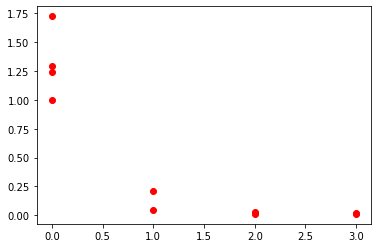

In [47]:
log_lr = [0.001, 0.005]
log_nstp = [4]
log_limiar = [0.5, 0.8]
lista_metrica = []

for i in log_nstp:
  for j in log_lr:
    for k in log_limiar:
      modelo = regLogistica(j,i,k)
      modelo.fit(x2_treino, y2_treino)
      
      prob = modelo.predict_proba(x2_treino)[:,1]
      probb = modelo.predict(x2_treino)

      pred_treino = np.where(prob > k, 1, 0)
      lista_metrica.append(roc_auc_score(y_true = y2_treino, y_score = pred_treino))
      
      print('Parametros: log_lr = {}, log_nsteps = {} e log_limiar {}'.format(j, i, k))
      print("Predict_Proba:", prob)
      print("Predict:", modelo.predict(prob))
      print("Métrica ROC-AUC:")
      print('Médio Treino', np.mean(lista_metrica))
      print('====='*10)
